In [1]:
import csv
import json
import pandas as pd
from datetime import datetime
import numpy as np
from collections import Counter


import warnings
warnings.filterwarnings("ignore")


localFolder = "../data_2019_processed/"
baseFolder = "../../Dataset_ECUADOR_2019/"

In [2]:
# Dataframe of all datasets
# initialize list of lists
datasets = [['0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs'],
            ['0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA'], 
            ['2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0'], 
            ['2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys'], 
            #['5FLZBTVAPwdq9QezHE2sVCJIs7p+r6mCemA2gp9jATk'], #does not have the file
            ['7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA'], 
            ['a9Qgj8ENWrHvl9QqlXcIPKmyGMKgbfHk9Dbqon1HQP4'], 
            ['ae4JJBZDycEcY8McJF+3BxyvZ1619y03BNdCxzpZTc'], 
            ['Ch3u5Oaz96VSrQbf0z31X6jEIbeIekkC0mwPzCdeJ1U'], 
            ['CH8f0yZkZL13zWuE9ks1CkVJRVrr+jsGdUXHrZ6YeA'], 
            ['DHO1K4jgiwZJOfQTrxvKE2vn7hkjamigroGD5IaeRc'], 
            ['DHPqzSqSttiba1L3BD1cptNJPjSxZ8rXxF9mY3za6WA'], 
            ['dQEFscjqnIlug8Tgq97JohhSQPG2DEOWJqS86wCrcY'], 
            ['HFvs2CohmhHte+AaCzFasjzegGzxZKPhkrX23iI6Xo'], 
            ['jgB9E8v3Z6PKdTRTCMAijBllA9YEMtrmHbe4qsbmJWw'], 
            ['JkY++R7E8myldLN3on6iQ78Ee78zCbrLuggfwGju3I'], 
            ['K4SLohf+TN1Ak8Dn8iE3Lme7rEMPISfppB2sXfHX8'], 
            ['oGaWetJJJEWHuvYdWYo826SQxfhCExVVQ2da8LE1Y7Q'], 
            ['pyt24oiDAHsmgWMvkFKz2fn2pwcHiXchd6KchLM'], 
            ['PZCf1nfvhR+6fk+7+sPNMYOgb8BAMmtQtfoRS83Suc'], 
            ['QUNCATForxzK0HHw46LrGOMWh0eVA8Y5XWEiUXX+cQ'], 
            ['rIl2UK9+bQ+tzpFdbJAdbBxEa5GbgrgC030yEaENLw'], 
            ['RoBW3cDOO9wWRMPO2twQff83MPc+OXn6gJ+a1DafreI'], 
            ['SH3kQeyd5volraxw8vOyhlowNqWBPr1IJ9URNXUL4'], 
            ['VVpwFNMrEglveh6MDN8lrRzTy5OwzglD4FURfM4A2is'], 
            ['Wa1mcNmbh66S7VS6GIzyfCFMD3SGhbtDQyFP1ywJEsw'], 
            ['XCKRE0BWRHxfP1kZIihgtT+jUjSp2GE8v5ZlhcIhVmA'], 
            ['YI5Y79K6GXqAUoGP6PNyII8WKlAoel4urDxWSVVOvBw'], 
            ['ypklj+8GJ15rOIH1lpKQtFJOuK+VdvyCuBPqhY3aoM'], 
            ['ZSsAZ0Pq+MCqFrnjsRFn5Ua09pMCVaOV9c8ZuYb7XQY']]
  
# Create the pandas DataFrame
folders = pd.DataFrame(datasets, columns=['folder'])

#folders

In [3]:
timestamp = 0
count_24_plus, count_12_24_plus, count_12_minus, count_0 = 0,0,0,0
# analyse the forms
allData = pd.DataFrame()
for indexFolder, folder in folders.iterrows():
   
    dataFLabel = pd.read_csv(localFolder+"form/sleep_form_"+folder['folder']+"_treated.csv",
                   delimiter=',', encoding="utf8")
    originalFLabel = pd.read_csv(baseFolder+folder['folder']+"/sleep_form_"+folder['folder']+".csv",
                   delimiter=',', encoding="utf8")
    
    count_24_plus = count_24_plus + dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]
    count_12_24_plus = count_12_24_plus + (dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    count_12_minus = count_12_minus + dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0]
    count_0 = count_0 + dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0]
                                 
    print(folder['folder'])
    print("Original Count: ",originalFLabel.shape[0])
    print("New Count: ",dataFLabel.shape[0])
    print("Time sleep: ",dataFLabel['time_sleeping_hs'].max(),dataFLabel['time_sleeping_hs'].min(),dataFLabel['time_sleeping_hs'].mean())
    print("Sleep variability",)
    print("Count > 24:",dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    print("Count <= 24 and > 12:",(dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]))
    print("Count <= 12:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0])
    print("Count <= 0:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0])
    print()  
    
        
                                  

0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs
Original Count:  33
New Count:  26
Time sleep:  20.75333333333333 2.5 6.80219017094017
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 2
Count <= 12: 24
Count <= 0: 0

0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA
Original Count:  31
New Count:  22
Time sleep:  22.50277777777778 2.5133333333333336 8.58574494949495
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 4
Count <= 12: 18
Count <= 0: 0

2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0
Original Count:  48
New Count:  30
Time sleep:  16.0 1.0 5.175129629629629
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 1
Count <= 12: 29
Count <= 0: 0

2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys
Original Count:  50
New Count:  15
Time sleep:  20.001388888888886 4.0 8.023129629629628
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 1
Count <= 12: 14
Count <= 0: 0

7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA
Original Count:  15
New Count:  13
Time sleep:  9.750277777777775 3.262222222222222 6.

In [4]:
print("Status geral")
print("Count > 24:",count_24_plus)
print("Count <= 24 and > 12:",count_12_24_plus)
print("Count <= 12:",count_12_minus)
print("Count <= 0:",count_0)
print("total:",(count_0+count_12_minus+count_12_24_plus+count_24_plus))
print()  

Status geral
Count > 24: 0
Count <= 24 and > 12: 54
Count <= 12: 550
Count <= 0: 0
total: 604



In [5]:
dataset = pd.read_csv(localFolder+"allData.csv")



In [6]:
dataset['timestamp2'].min()

1526043855

In [7]:
dsMetrics = pd.read_csv("result_trad_LSTM_undb.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,2,32,4,awake,0.816487,0.816165,0.999316,0.898502,0.034968,0.759976
1,LSTM,128,2,32,4,asleep,0.818162,0.880435,0.022665,0.044192,0.035210,0.760230
2,LSTM,128,2,32,4,avg,0.817325,0.848300,0.510990,0.471347,0.035089,0.760103
3,LSTM,128,7,32,4,awake,0.816279,0.816939,0.997492,0.898232,0.042564,0.773007
4,LSTM,128,7,32,4,asleep,0.817955,0.727362,0.029540,0.056774,0.042919,0.773408
5,LSTM,128,7,32,4,avg,0.817117,0.772151,0.513516,0.477503,0.042741,0.773207
6,LSTM,128,15,32,4,awake,0.819667,0.834128,0.971287,0.897498,0.182759,0.792314
7,LSTM,128,15,32,4,asleep,0.821224,0.562543,0.162330,0.251954,0.184185,0.792694
8,LSTM,128,15,32,4,avg,0.820446,0.698336,0.566808,0.574726,0.183472,0.792504
9,LSTM,128,30,32,4,awake,0.825880,0.832350,0.983974,0.901833,0.177295,0.803750


<AxesSubplot: xlabel='epochs'>

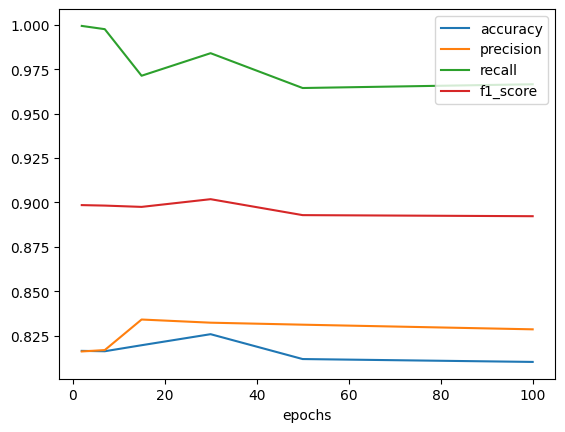

In [8]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "awake"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

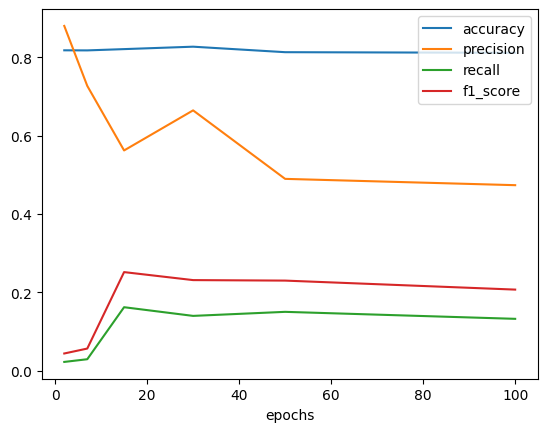

In [9]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

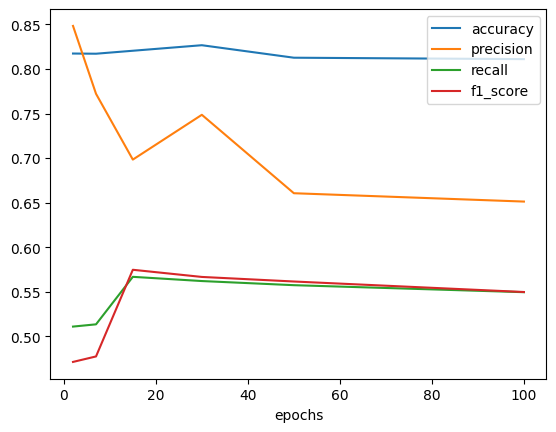

In [10]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "avg"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

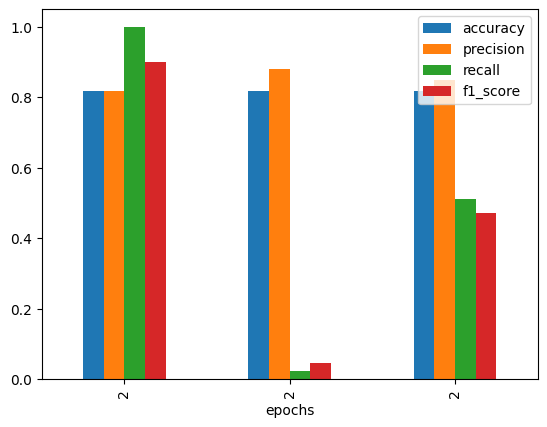

In [11]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['epochs'] == 2]
lines = dfMetricsClass[metrics].plot.bar(x='epochs')

lines

In [12]:
dsMetrics = pd.read_csv("result_trad_LSTM_over.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,2,32,4,awake,0.187176,0.000000,0.000000,0.000000,0.000000,0.644839
1,LSTM,128,2,32,4,asleep,0.185470,0.185470,1.000000,0.312906,0.000000,0.644644
2,LSTM,128,2,32,4,avg,0.186323,0.092735,0.500000,0.156453,0.000000,0.644742
3,LSTM,128,7,32,4,awake,0.187176,0.000000,0.000000,0.000000,0.000000,0.702939
4,LSTM,128,7,32,4,asleep,0.185470,0.185470,1.000000,0.312906,0.000000,0.700454
5,LSTM,128,7,32,4,avg,0.186323,0.092735,0.500000,0.156453,0.000000,0.701696
6,LSTM,128,15,32,4,awake,0.187176,0.000000,0.000000,0.000000,0.000000,0.737428
7,LSTM,128,15,32,4,asleep,0.185470,0.185470,1.000000,0.312906,0.000000,0.724653
8,LSTM,128,15,32,4,avg,0.186323,0.092735,0.500000,0.156453,0.000000,0.731041
9,LSTM,128,30,32,4,awake,0.195420,0.971186,0.010453,0.020683,0.003432,0.708356


In [13]:
dsMetrics = pd.read_csv("result3epochsLSTM_unb.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,120,20,0,2023-03-07 19:36:32.677338,2023-03-07 19:38:09.331168,96.653830,...,0.812824,1.000000,0.896749,0.000000,0.500000,[[0 25247]\n [0 109637]],0.0,25247.0,0.0,109637.0
1,LSTM,128,3,32,120,20,0,2023-03-07 19:36:32.677338,2023-03-07 19:38:09.331168,96.653830,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[109867 0]\n [25017 0]],109867.0,0.0,25017.0,0.0
2,LSTM,128,3,32,120,20,0,2023-03-07 19:36:32.677338,2023-03-07 19:38:09.331168,96.653830,...,0.406412,0.500000,0.448375,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,120,20,1,2023-03-07 19:38:10.037105,2023-03-07 19:39:34.114605,84.077500,...,0.812824,1.000000,0.896749,0.000000,0.500000,[[0 25247]\n [0 109637]],0.0,25247.0,0.0,109637.0
4,LSTM,128,3,32,120,20,1,2023-03-07 19:38:10.037105,2023-03-07 19:39:34.114605,84.077500,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[109867 0]\n [25017 0]],109867.0,0.0,25017.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LSTM,128,3,32,120,20,118,2023-03-07 22:17:07.017725,2023-03-07 22:18:26.771052,79.753327,...,0.576774,0.220570,0.319107,0.241249,0.591858,[[105818 4049]\n [19499 5518]],105818.0,4049.0,19499.0,5518.0
356,LSTM,128,3,32,120,20,118,2023-03-07 22:17:07.017725,2023-03-07 22:18:26.771052,79.753327,...,0.709779,0.591943,0.609067,0.240829,0.591665,NaN,NaN,NaN,NaN,NaN
357,LSTM,128,3,32,120,20,119,2023-03-07 22:18:27.474958,2023-03-07 22:19:47.041715,79.566757,...,0.842021,0.963926,0.898859,0.235564,0.589283,[[5419 19828]\n [3955 105682]],5419.0,19828.0,3955.0,105682.0
358,LSTM,128,3,32,120,20,119,2023-03-07 22:18:27.474958,2023-03-07 22:19:47.041715,79.566757,...,0.575208,0.215533,0.313570,0.236360,0.589645,[[105885 3982]\n [19625 5392]],105885.0,3982.0,19625.0,5392.0


In [14]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
278,LSTM,128,3,32,120,20,92,2023-03-07 21:42:09.989985,2023-03-07 21:43:29.653812,79.663827,...,0.740914,0.60164,0.622599,0.268212,0.601307,NaN,NaN,NaN,NaN,NaN


In [15]:
ss.loc[ss['recall'] == ss['recall'].max()]

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
290,LSTM,128,3,32,120,20,96,2023-03-07 21:47:32.450976,2023-03-07 21:48:53.515407,81.064431,...,0.73726,0.603846,0.625168,0.271964,0.6035,NaN,NaN,NaN,NaN,NaN


In [16]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()]

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
290,LSTM,128,3,32,120,20,96,2023-03-07 21:47:32.450976,2023-03-07 21:48:53.515407,81.064431,...,0.73726,0.603846,0.625168,0.271964,0.6035,NaN,NaN,NaN,NaN,NaN


In [17]:
dsMetrics.iloc[287:294][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
287,avg,95,3,0.831218,0.736850,0.599042,0.619146
288,awake,96,3,0.831307,0.846631,0.967775,0.903159
289,asleep,96,3,0.832656,0.627890,0.239917,0.347177
290,avg,96,3,0.831982,0.737260,0.603846,0.625168
291,awake,97,3,0.830921,0.845486,0.969089,0.903078
292,asleep,97,3,0.832286,0.629895,0.232122,0.339234
293,avg,97,3,0.831603,0.737690,0.600606,0.621156


In [18]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample01.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.925126,0.030090,0.058285,0.007457,0.509757,[[24980 267]\n [106338 3299]],24980.0,267.0,106338.0,3299.0
1,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.188481,0.989367,0.316641,0.007348,0.509702,[[3300 106567]\n [266 24751]],3300.0,106567.0,266.0,24751.0
2,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.556804,0.509729,0.187463,0.007402,0.509730,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,120,20,1,2023-03-08 00:58:26.926597,2023-03-08 01:00:33.079804,126.153207,...,0.938096,0.078924,0.145599,0.022250,0.528154,[[24676 571]\n [100984 8653]],24676.0,571.0,100984.0,8653.0
4,LSTM,128,3,32,120,20,1,2023-03-08 00:58:26.926597,2023-03-08 01:00:33.079804,126.153207,...,0.194581,0.977375,0.324549,0.022001,0.528090,[[8658 101209]\n [566 24451]],8658.0,101209.0,566.0,24451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LSTM,128,3,32,120,20,118,2023-03-08 04:59:05.075273,2023-03-08 05:01:09.036016,123.960743,...,0.488262,0.694168,0.573287,0.454493,0.764252,[[91666 18201]\n [7651 17366]],91666.0,18201.0,7651.0,17366.0
356,LSTM,128,3,32,120,20,118,2023-03-08 04:59:05.075273,2023-03-08 05:01:09.036016,123.960743,...,0.705069,0.764635,0.724816,0.455264,0.764070,NaN,NaN,NaN,NaN,NaN
357,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.921604,0.838066,0.877852,0.458956,0.764242,[[17431 7816]\n [17754 91883]],17431.0,7816.0,17754.0,91883.0
358,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.491943,0.691890,0.575031,0.457396,0.764592,[[91991 17876]\n [7708 17309]],91991.0,17876.0,7708.0,17309.0


In [19]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
359,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.706773,0.764978,0.726441,0.458176,0.764417,NaN,NaN,NaN,NaN,NaN


In [20]:
ss.loc[ss['recall'] == ss['recall'].max()]

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
344,LSTM,128,3,32,120,20,114,2023-03-08 04:50:41.011966,2023-03-08 04:52:46.542514,125.530548,...,0.701286,0.765687,0.721275,0.449431,0.765141,NaN,NaN,NaN,NaN,NaN


In [21]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()]

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
359,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.706773,0.764978,0.726441,0.458176,0.764417,NaN,NaN,NaN,NaN,NaN


In [22]:
dsMetrics.iloc[341:360][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
341,avg,113,3,0.801630,0.700140,0.765288,0.720083
342,awake,114,3,0.803120,0.923775,0.825935,0.872119
343,asleep,114,3,0.802942,0.478798,0.705440,0.570431
344,avg,114,3,0.803031,0.701286,0.765687,0.721275
345,awake,115,3,0.804847,0.923017,0.829054,0.873516
346,asleep,115,3,0.804684,0.481762,0.701123,0.571103
347,avg,115,3,0.804766,0.702390,0.765089,0.722309
348,awake,116,3,0.806790,0.922280,0.832447,0.875064
349,asleep,116,3,0.806656,0.485220,0.696806,0.572076
350,avg,116,3,0.806723,0.703750,0.764627,0.723570


In [23]:
dsMetrics = pd.read_csv("result3epochsMLPunbalanced.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,MLP,12,3,32,120,20,0,2023-03-08 10:48:29.435324,2023-03-08 10:48:49.236085,19.800761,...,0.813660,1.000000,0.897258,0.000000,0.500000,[[0 25135]\n [0 109753]],0.0,25135.0,0.0,109753.0
1,MLP,12,3,32,120,20,0,2023-03-08 10:48:29.435324,2023-03-08 10:48:49.236085,19.800761,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[109753 0]\n [25135 0]],109753.0,0.0,25135.0,0.0
2,MLP,12,3,32,120,20,0,2023-03-08 10:48:29.435324,2023-03-08 10:48:49.236085,19.800761,...,0.406830,0.500000,0.448629,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,MLP,12,3,32,120,20,1,2023-03-08 10:48:49.941883,2023-03-08 10:49:00.801172,10.859289,...,0.813631,0.999809,0.897163,-0.000311,0.499904,[[0 25135]\n [21 109732]],0.0,25135.0,21.0,109732.0
4,MLP,12,3,32,120,20,1,2023-03-08 10:48:49.941883,2023-03-08 10:49:00.801172,10.859289,...,0.000000,0.000000,0.000000,-0.000311,0.499904,[[109732 21]\n [25135 0]],109732.0,21.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MLP,12,3,32,120,20,118,2023-03-08 11:10:42.508558,2023-03-08 11:10:52.382053,9.873495,...,0.571598,0.249334,0.347212,0.263891,0.603269,[[105056 4697]\n [18868 6267]],105056.0,4697.0,18868.0,6267.0
356,MLP,12,3,32,120,20,118,2023-03-08 11:10:42.508558,2023-03-08 11:10:52.382053,9.873495,...,0.709672,0.603269,0.623184,0.263891,0.603269,NaN,NaN,NaN,NaN,NaN
357,MLP,12,3,32,120,20,119,2023-03-08 11:10:53.089684,2023-03-08 11:11:03.273396,10.183712,...,0.846189,0.962069,0.900416,0.257929,0.599236,[[5942 19193]\n [4163 105590]],5942.0,19193.0,4163.0,105590.0
358,MLP,12,3,32,120,20,119,2023-03-08 11:10:53.089684,2023-03-08 11:11:03.273396,10.183712,...,0.588026,0.236403,0.337230,0.257929,0.599236,[[105590 4163]\n [19193 5942]],105590.0,4163.0,19193.0,5942.0


In [24]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()]

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
332,MLP,12,3,32,120,20,110,2023-03-08 11:09:18.057141,2023-03-08 11:09:27.904546,9.847405,...,0.723817,0.602033,0.62259,0.265352,0.602033,NaN,NaN,NaN,NaN,NaN


In [25]:
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
332,avg,110,3,0.82868,0.723817,0.602033,0.62259


In [26]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
338,avg,112,3,0.827383,0.716609,0.606819,0.627808


In [27]:
ss.loc[ss['precision'] == ss['precision'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
11,avg,3,3,0.81816,0.804129,0.515449,0.481241


In [28]:
ss1 = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss1

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
1,MLP,12,3,32,120,20,0,2023-03-08 10:48:29.435324,2023-03-08 10:48:49.236085,19.800761,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[109753 0]\n [25135 0]],109753.0,0.0,25135.0,0.0
4,MLP,12,3,32,120,20,1,2023-03-08 10:48:49.941883,2023-03-08 10:49:00.801172,10.859289,...,0.000000,0.000000,0.000000,-0.000311,0.499904,[[109732 21]\n [25135 0]],109732.0,21.0,25135.0,0.0
7,MLP,12,3,32,120,20,2,2023-03-08 10:49:01.502882,2023-03-08 10:49:12.104075,10.601193,...,0.762009,0.027770,0.053587,0.041021,0.512892,[[109535 218]\n [24437 698]],109535.0,218.0,24437.0,698.0
10,MLP,12,3,32,120,20,3,2023-03-08 10:49:12.808995,2023-03-08 10:49:28.301946,15.492951,...,0.789876,0.032902,0.063173,0.049000,0.515449,[[109533 220]\n [24308 827]],109533.0,220.0,24308.0,827.0
13,MLP,12,3,32,120,20,4,2023-03-08 10:49:29.014785,2023-03-08 10:49:39.576598,10.561813,...,0.766043,0.022797,0.044276,0.033871,0.510601,[[109578 175]\n [24562 573]],109578.0,175.0,24562.0,573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,MLP,12,3,32,120,20,115,2023-03-08 11:10:10.926576,2023-03-08 11:10:20.686991,9.760415,...,0.601852,0.178436,0.275263,0.207744,0.575702,[[106786 2967]\n [20650 4485]],106786.0,2967.0,20650.0,4485.0
349,MLP,12,3,32,120,20,116,2023-03-08 11:10:21.388115,2023-03-08 11:10:31.259176,9.871061,...,0.588891,0.224826,0.325415,0.247980,0.594441,[[105808 3945]\n [19484 5651]],105808.0,3945.0,19484.0,5651.0
352,MLP,12,3,32,120,20,117,2023-03-08 11:10:31.964623,2023-03-08 11:10:41.798084,9.833461,...,0.588027,0.204376,0.303327,0.229241,0.585792,[[106154 3599]\n [19998 5137]],106154.0,3599.0,19998.0,5137.0
355,MLP,12,3,32,120,20,118,2023-03-08 11:10:42.508558,2023-03-08 11:10:52.382053,9.873495,...,0.571598,0.249334,0.347212,0.263891,0.603269,[[105056 4697]\n [18868 6267]],105056.0,4697.0,18868.0,6267.0


In [29]:
ss1.loc[ss1['accuracy'] == ss1['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
331,asleep,110,3,0.82868,0.600536,0.24074,0.343699


In [30]:
ss1.loc[ss1['recall'] == ss1['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
337,asleep,112,3,0.827383,0.584297,0.255222,0.355264


In [31]:
ss1.loc[ss1['f1_score'] == ss1['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
337,asleep,112,3,0.827383,0.584297,0.255222,0.355264


In [32]:
dsMetrics.iloc[331:340][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
331,asleep,110,3,0.828680,0.600536,0.240740,0.343699
332,avg,110,3,0.828680,0.723817,0.602033,0.622590
333,awake,111,3,0.828673,0.842921,0.970242,0.902111
334,asleep,111,3,0.828673,0.618324,0.210503,0.314080
335,avg,111,3,0.828673,0.730622,0.590373,0.608096
336,awake,112,3,0.827383,0.848921,0.958416,0.900352
337,asleep,112,3,0.827383,0.584297,0.255222,0.355264
338,avg,112,3,0.827383,0.716609,0.606819,0.627808
339,awake,113,3,0.825366,0.838386,0.972921,0.900657


In [33]:
dsMetrics = pd.read_csv("result1epochsMLPunbalanced-20noves.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,MLP,20,1,16,120,20,0,2023-03-08 18:05:19.995060,2023-03-08 18:05:36.934655,16.939595,...,0.813660,1.000000,0.897258,0.000000,0.500000,[[0 25135]\n [0 109753]],0.0,25135.0,0.0,109753.0
1,MLP,20,1,16,120,20,0,2023-03-08 18:05:19.995060,2023-03-08 18:05:36.934655,16.939595,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[109753 0]\n [25135 0]],109753.0,0.0,25135.0,0.0
2,MLP,20,1,16,120,20,0,2023-03-08 18:05:19.995060,2023-03-08 18:05:36.934655,16.939595,...,0.406830,0.500000,0.448629,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,MLP,20,1,16,120,20,1,2023-03-08 18:05:37.639676,2023-03-08 18:05:46.057970,8.418294,...,0.813622,0.999745,0.897131,-0.000415,0.499872,[[0 25135]\n [28 109725]],0.0,25135.0,28.0,109725.0
4,MLP,20,1,16,120,20,1,2023-03-08 18:05:37.639676,2023-03-08 18:05:46.057970,8.418294,...,0.000000,0.000000,0.000000,-0.000415,0.499872,[[109725 28]\n [25135 0]],109725.0,28.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MLP,20,1,16,120,20,118,2023-03-08 18:22:57.911631,2023-03-08 18:23:05.692877,7.781246,...,0.463591,0.283429,0.351785,0.245033,0.604162,[[101510 8243]\n [18011 7124]],101510.0,8243.0,18011.0,7124.0
356,MLP,20,1,16,120,20,118,2023-03-08 18:22:57.911631,2023-03-08 18:23:05.692877,7.781246,...,0.656449,0.604162,0.618638,0.245033,0.604162,NaN,NaN,NaN,NaN,NaN
357,MLP,20,1,16,120,20,119,2023-03-08 18:23:06.401954,2023-03-08 18:23:14.093539,7.691585,...,0.840379,0.909797,0.873712,0.180302,0.577616,[[6169 18966]\n [9900 99853]],6169.0,18966.0,9900.0,99853.0
358,MLP,20,1,16,120,20,119,2023-03-08 18:23:06.401954,2023-03-08 18:23:14.093539,7.691585,...,0.383907,0.245435,0.299437,0.180302,0.577616,[[99853 9900]\n [18966 6169]],99853.0,9900.0,18966.0,6169.0


In [34]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
140,avg,46,1,0.830111,0.730296,0.602038,0.622944


In [35]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
212,avg,70,1,0.819339,0.692738,0.643178,0.660247


In [36]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
212,avg,70,1,0.819339,0.692738,0.643178,0.660247


In [37]:
ss1 = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss1

,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
1,MLP,20,1,16,120,20,0,2023-03-08 18:05:19.995060,2023-03-08 18:05:36.934655,16.939595,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[109753 0]\n [25135 0]],109753.0,0.0,25135.0,0.0
4,MLP,20,1,16,120,20,1,2023-03-08 18:05:37.639676,2023-03-08 18:05:46.057970,8.418294,...,0.000000,0.000000,0.000000,-0.000415,0.499872,[[109725 28]\n [25135 0]],109725.0,28.0,25135.0,0.0
7,MLP,20,1,16,120,20,2,2023-03-08 18:05:46.774855,2023-03-08 18:05:57.195309,10.420454,...,0.129964,0.001432,0.002833,-0.001234,0.499618,[[109512 241]\n [25099 36]],109512.0,241.0,25099.0,36.0
10,MLP,20,1,16,120,20,3,2023-03-08 18:05:57.905797,2023-03-08 18:06:06.119375,8.213578,...,0.269949,0.006326,0.012362,0.003862,0.501204,[[109323 430]\n [24976 159]],109323.0,430.0,24976.0,159.0
13,MLP,20,1,16,120,20,4,2023-03-08 18:06:06.825196,2023-03-08 18:06:15.078519,8.253323,...,0.454768,0.022200,0.042334,0.025429,0.508052,[[109084 669]\n [24577 558]],109084.0,669.0,24577.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,MLP,20,1,16,120,20,115,2023-03-08 18:22:32.141588,2023-03-08 18:22:39.947215,7.805627,...,0.450095,0.263020,0.332019,0.225569,0.594714,[[101676 8077]\n [18524 6611]],101676.0,8077.0,18524.0,6611.0
349,MLP,20,1,16,120,20,116,2023-03-08 18:22:40.658663,2023-03-08 18:22:48.681188,8.022525,...,0.491705,0.282992,0.359233,0.258254,0.607998,[[102400 7353]\n [18022 7113]],102400.0,7353.0,18022.0,7113.0
352,MLP,20,1,16,120,20,117,2023-03-08 18:22:49.387464,2023-03-08 18:22:57.204617,7.817153,...,0.452907,0.286970,0.351331,0.241723,0.603792,[[101040 8713]\n [17922 7213]],101040.0,8713.0,17922.0,7213.0
355,MLP,20,1,16,120,20,118,2023-03-08 18:22:57.911631,2023-03-08 18:23:05.692877,7.781246,...,0.463591,0.283429,0.351785,0.245033,0.604162,[[101510 8243]\n [18011 7124]],101510.0,8243.0,18011.0,7124.0


In [38]:
ss1.loc[ss1['recall'] == ss1['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
157,asleep,52,1,0.774576,0.399848,0.418699,0.409056


In [39]:
ss1.loc[ss1['f1_score'] == ss1['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
211,asleep,70,1,0.819339,0.521948,0.362363,0.427756


In [53]:
dsMetrics = pd.read_csv("result3epochsMLP_oversample01.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,MLP,12,3,32,120,20,0,2023-03-08 11:48:09.221794,2023-03-08 11:48:33.919830,24.698036,...,0.933756,0.012073,0.023837,0.003131,0.504166,[[25041 94]\n [108428 1325]],25041.0,94.0,108428.0,1325.0
1,MLP,12,3,32,120,20,0,2023-03-08 11:48:09.221794,2023-03-08 11:48:33.919830,24.698036,...,0.187617,0.996260,0.315768,0.003131,0.504166,[[1325 108428]\n [94 25041]],1325.0,108428.0,94.0,25041.0
2,MLP,12,3,32,120,20,0,2023-03-08 11:48:09.221794,2023-03-08 11:48:33.919830,24.698036,...,0.560686,0.504166,0.169802,0.003131,0.504166,NaN,NaN,NaN,NaN,NaN
3,MLP,12,3,32,120,20,1,2023-03-08 11:48:34.624921,2023-03-08 11:48:49.935296,15.310375,...,0.949971,0.030277,0.058684,0.008866,0.511657,[[24960 175]\n [106430 3323]],24960.0,175.0,106430.0,3323.0
4,MLP,12,3,32,120,20,1,2023-03-08 11:48:34.624921,2023-03-08 11:48:49.935296,15.310375,...,0.189969,0.993038,0.318927,0.008866,0.511657,[[3323 106430]\n [175 24960]],3323.0,106430.0,175.0,24960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MLP,12,3,32,120,20,118,2023-03-08 12:16:51.085445,2023-03-08 12:17:04.164744,13.079299,...,0.207427,0.964512,0.341427,0.050065,0.560254,[[17121 92632]\n [892 24243]],17121.0,92632.0,892.0,24243.0
356,MLP,12,3,32,120,20,118,2023-03-08 12:16:51.085445,2023-03-08 12:17:04.164744,13.079299,...,0.578953,0.560254,0.304716,0.050065,0.560254,NaN,NaN,NaN,NaN,NaN
357,MLP,12,3,32,120,20,119,2023-03-08 12:17:04.876053,2023-03-08 12:17:18.300892,13.424839,...,0.951618,0.110931,0.198699,0.034701,0.543152,[[24516 619]\n [97578 12175]],24516.0,619.0,97578.0,12175.0
358,MLP,12,3,32,120,20,119,2023-03-08 12:17:04.876053,2023-03-08 12:17:18.300892,13.424839,...,0.200796,0.975373,0.333032,0.034701,0.543152,[[12175 97578]\n [619 24516]],12175.0,97578.0,619.0,24516.0


In [54]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
143,avg,47,3,0.571978,0.623801,0.699187,0.546771


In [55]:

ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
143,avg,47,3,0.571978,0.623801,0.699187,0.546771


In [48]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
143,avg,47,3,0.571978,0.623801,0.699187,0.546771


In [49]:
ss = dsMetrics.loc[dsMetrics['class'] == "asleep"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
142,asleep,47,3,0.571978,0.29087,0.901969,0.439885


In [50]:
dsMetrics.iloc[140:144][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
140,avg,46,3,0.566752,0.620320,0.693261,0.541829
141,awake,47,3,0.571978,0.956731,0.496406,0.653657
142,asleep,47,3,0.571978,0.290870,0.901969,0.439885
143,avg,47,3,0.571978,0.623801,0.699187,0.546771


In [58]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample01.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.925126,0.030090,0.058285,0.007457,0.509757,[[24980 267]\n [106338 3299]],24980.0,267.0,106338.0,3299.0
1,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.188481,0.989367,0.316641,0.007348,0.509702,[[3300 106567]\n [266 24751]],3300.0,106567.0,266.0,24751.0
2,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.556804,0.509729,0.187463,0.007402,0.509730,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,120,20,1,2023-03-08 00:58:26.926597,2023-03-08 01:00:33.079804,126.153207,...,0.938096,0.078924,0.145599,0.022250,0.528154,[[24676 571]\n [100984 8653]],24676.0,571.0,100984.0,8653.0
4,LSTM,128,3,32,120,20,1,2023-03-08 00:58:26.926597,2023-03-08 01:00:33.079804,126.153207,...,0.194581,0.977375,0.324549,0.022001,0.528090,[[8658 101209]\n [566 24451]],8658.0,101209.0,566.0,24451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LSTM,128,3,32,120,20,118,2023-03-08 04:59:05.075273,2023-03-08 05:01:09.036016,123.960743,...,0.488262,0.694168,0.573287,0.454493,0.764252,[[91666 18201]\n [7651 17366]],91666.0,18201.0,7651.0,17366.0
356,LSTM,128,3,32,120,20,118,2023-03-08 04:59:05.075273,2023-03-08 05:01:09.036016,123.960743,...,0.705069,0.764635,0.724816,0.455264,0.764070,NaN,NaN,NaN,NaN,NaN
357,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.921604,0.838066,0.877852,0.458956,0.764242,[[17431 7816]\n [17754 91883]],17431.0,7816.0,17754.0,91883.0
358,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.491943,0.691890,0.575031,0.457396,0.764592,[[91991 17876]\n [7708 17309]],91991.0,17876.0,7708.0,17309.0


In [59]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]



,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,3,0.810378,0.706773,0.764978,0.726441


In [62]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
344,avg,114,3,0.803031,0.701286,0.765687,0.721275


In [63]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,3,0.810378,0.706773,0.764978,0.726441


In [65]:
dsMetrics.iloc[356:360][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
356,avg,118,3,0.808391,0.705069,0.764635,0.724816
357,awake,119,3,0.810430,0.921604,0.838066,0.877852
358,asleep,119,3,0.810326,0.491943,0.691890,0.575031
359,avg,119,3,0.810378,0.706773,0.764978,0.726441


In [66]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample_smote.csv")
print(dsMetrics.columns)
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,3,0.811453,0.707559,0.76459,0.727093


In [67]:
dsMetrics.iloc[356:360][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
356,avg,118,3,0.810571,0.707344,0.766407,0.727184
357,awake,119,3,0.811475,0.921107,0.840008,0.878691
358,asleep,119,3,0.811431,0.494011,0.689171,0.575496
359,avg,119,3,0.811453,0.707559,0.764590,0.727093


In [68]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample_smote_300ep.csv")
print(dsMetrics.columns)
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
854,avg,284,3,0.841768,0.73759,0.727967,0.732516


In [70]:
dsMetrics.iloc[852:855][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
852,awake,284,3,0.841486,0.896549,0.909985,0.903217
853,asleep,284,3,0.842049,0.578631,0.545949,0.561815
854,avg,284,3,0.841768,0.737590,0.727967,0.732516


In [75]:
dsMetrics = pd.read_csv("result1epochsMLP_oversample_smote.csv")
print(dsMetrics.columns)
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,1,0.763634,0.678218,0.760537,0.692087


In [76]:
dsMetrics.iloc[356:360][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
356,avg,118,1,0.759400,0.669969,0.745451,0.683432
357,awake,119,1,0.763634,0.931863,0.765473,0.840512
358,asleep,119,1,0.763634,0.424573,0.755600,0.543662
359,avg,119,1,0.763634,0.678218,0.760537,0.692087


In [73]:
dsMetrics = pd.read_csv("result3epochsMLP_oversample_smote.csv")
print(dsMetrics.columns)
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
131,avg,43,3,0.474994,0.602854,0.647105,0.465744


In [86]:
dsMetrics = pd.read_csv("result_trad_LSTM_over_smote.csv")
print(dsMetrics.columns)
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,epochs,accuracy,precision,recall,f1_score
17,avg,100,0.191735,0.521118,0.501062,0.164461


In [88]:
dsMetrics.iloc[15:18][metrics]

,class,epochs,accuracy,precision,recall,f1_score
15,awake,100,0.192588,0.856445,0.007999,0.015850
16,asleep,100,0.190883,0.185791,0.994124,0.313072
17,avg,100,0.191735,0.521118,0.501062,0.164461


In [82]:
dsMetrics = pd.read_csv("result_trad_LSTM_over1.csv")
print(dsMetrics.columns)
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,epochs,accuracy,precision,recall,f1_score
8,avg,300,0.506406,0.623371,0.682148,0.494783


In [84]:
dsMetrics[metrics]

,class,epochs,accuracy,precision,recall,f1_score
0,awake,150,0.424483,0.985972,0.296168,0.455510
1,asleep,150,0.422793,0.240861,0.981573,0.386806
2,avg,150,0.423638,0.613416,0.638870,0.421158
3,awake,200,0.424617,0.984362,0.296834,0.456124
4,asleep,200,0.422926,0.240623,0.979374,0.386329
5,avg,200,0.423772,0.612493,0.638104,0.421227
6,awake,300,0.507258,0.978796,0.402510,0.570439
7,asleep,300,0.505553,0.267946,0.961786,0.419126
8,avg,300,0.506406,0.623371,0.682148,0.494783


In [80]:
dsMetrics = pd.read_csv("result_trad_LSTM_over.csv")
print(dsMetrics.columns)
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,epochs,accuracy,precision,recall,f1_score
20,avg,120,0.442514,0.61453,0.648168,0.438466


In [4]:
dsMetrics = pd.read_csv("result1epochsMLPunbalanced2.csv")
print(dsMetrics.columns)
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,epochs,accuracy,precision,recall,f1_score
341,avg,1,0.82507,0.746244,0.555368,0.55626


In [7]:
dsMetrics.iloc[334:346][metrics]

,class,epochs,accuracy,precision,recall,f1_score
334,asleep,1,0.824269,0.692081,0.102566,0.178656
335,avg,1,0.824269,0.760052,0.546058,0.540132
336,awake,1,0.824395,0.829553,0.986971,0.901441
337,asleep,1,0.824395,0.668059,0.114502,0.195496
338,avg,1,0.824395,0.748806,0.550736,0.548469
339,awake,1,0.825070,0.831065,0.985294,0.901632
340,asleep,1,0.825070,0.661422,0.125443,0.210889
341,avg,1,0.825070,0.746244,0.555368,0.556260
342,awake,1,0.824239,0.828484,0.988665,0.901515
343,asleep,1,0.824239,0.682248,0.106266,0.183890


In [8]:
dsMetrics = pd.read_csv("result1epochsMLPunbalanced.csv")
print(dsMetrics.columns)
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,epochs,accuracy,precision,recall,f1_score
110,avg,1,0.831905,0.761792,0.581378,0.596115


In [9]:
dsMetrics.iloc[108:111][metrics]

,class,epochs,accuracy,precision,recall,f1_score
108,awake,1,0.831905,0.839624,0.980739,0.904712
109,asleep,1,0.831905,0.683959,0.182017,0.287519
110,avg,1,0.831905,0.761792,0.581378,0.596115
